<a href="https://colab.research.google.com/github/gefedya/Algorithms_exam/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 29 ноября 9:00

Мы предлагаем выполнять задания прямо в этом ноутбуке. **Пожалуйста, не стирайте условия задач и не переименовывайте ноутбук!**

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [21]:
# YOUR CODE GOES HERE
np.random.seed(42)

N = 100
alpha = 0.95
theta = 10
lower_bound = (1 - alpha) / 2
upper_bound = (1 + alpha) / 2

def draw_confidence_interval(theta, sample, estimates, distribution, intervals, l_bound, u_bound, estimate_label):
  x = np.arange(N) + 1

  plt.figure(figsize=(18, 8))
  plt.title(r"Confidence interval of parameter $\theta = 10$ for " + f"{distribution}")
  plt.hlines(y=theta, xmin=1, xmax=N, color='black', linestyle='dotted', alpha=0.75, label=r'Real value of $\theta$')
  plt.scatter(x, sample, s=30, c="blue", alpha=0.2)
  plt.plot(x, estimates(sample), linestyle='--', color = "orange", label=estimate_label)
  plt.fill_between(x, intervals.T[0], intervals.T[1],
                 alpha=0.3, color='green', label='Confidence interval')
  
  plt.xlabel("sample size")
  plt.ylabel(r"value of theta")
  plt.ylim(theta - l_bound, 10 + u_bound)
  plt.xlim(1, 104)
  plt.legend()

  plt.show()


Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Один из искомых интервалов:

$$
  [X_{(n)}, \dfrac{X_{(n)}} {\sqrt[n]{1 - \alpha} }],
$$
где $ \sqrt[n]{1 - \alpha} $ суть $ ( 1 - \alpha) $-квантиль распределения $X_{(n)}, X_i \sim U[0, 1]$.

*Пояснение:* Поскольку необходимо минимизировать интервал, а функция $x^n$ на отрезке $[0, 1]$ быстрее всего растет при приближении к 1, то правильнее всего взять самый "крайний справа" интервал.

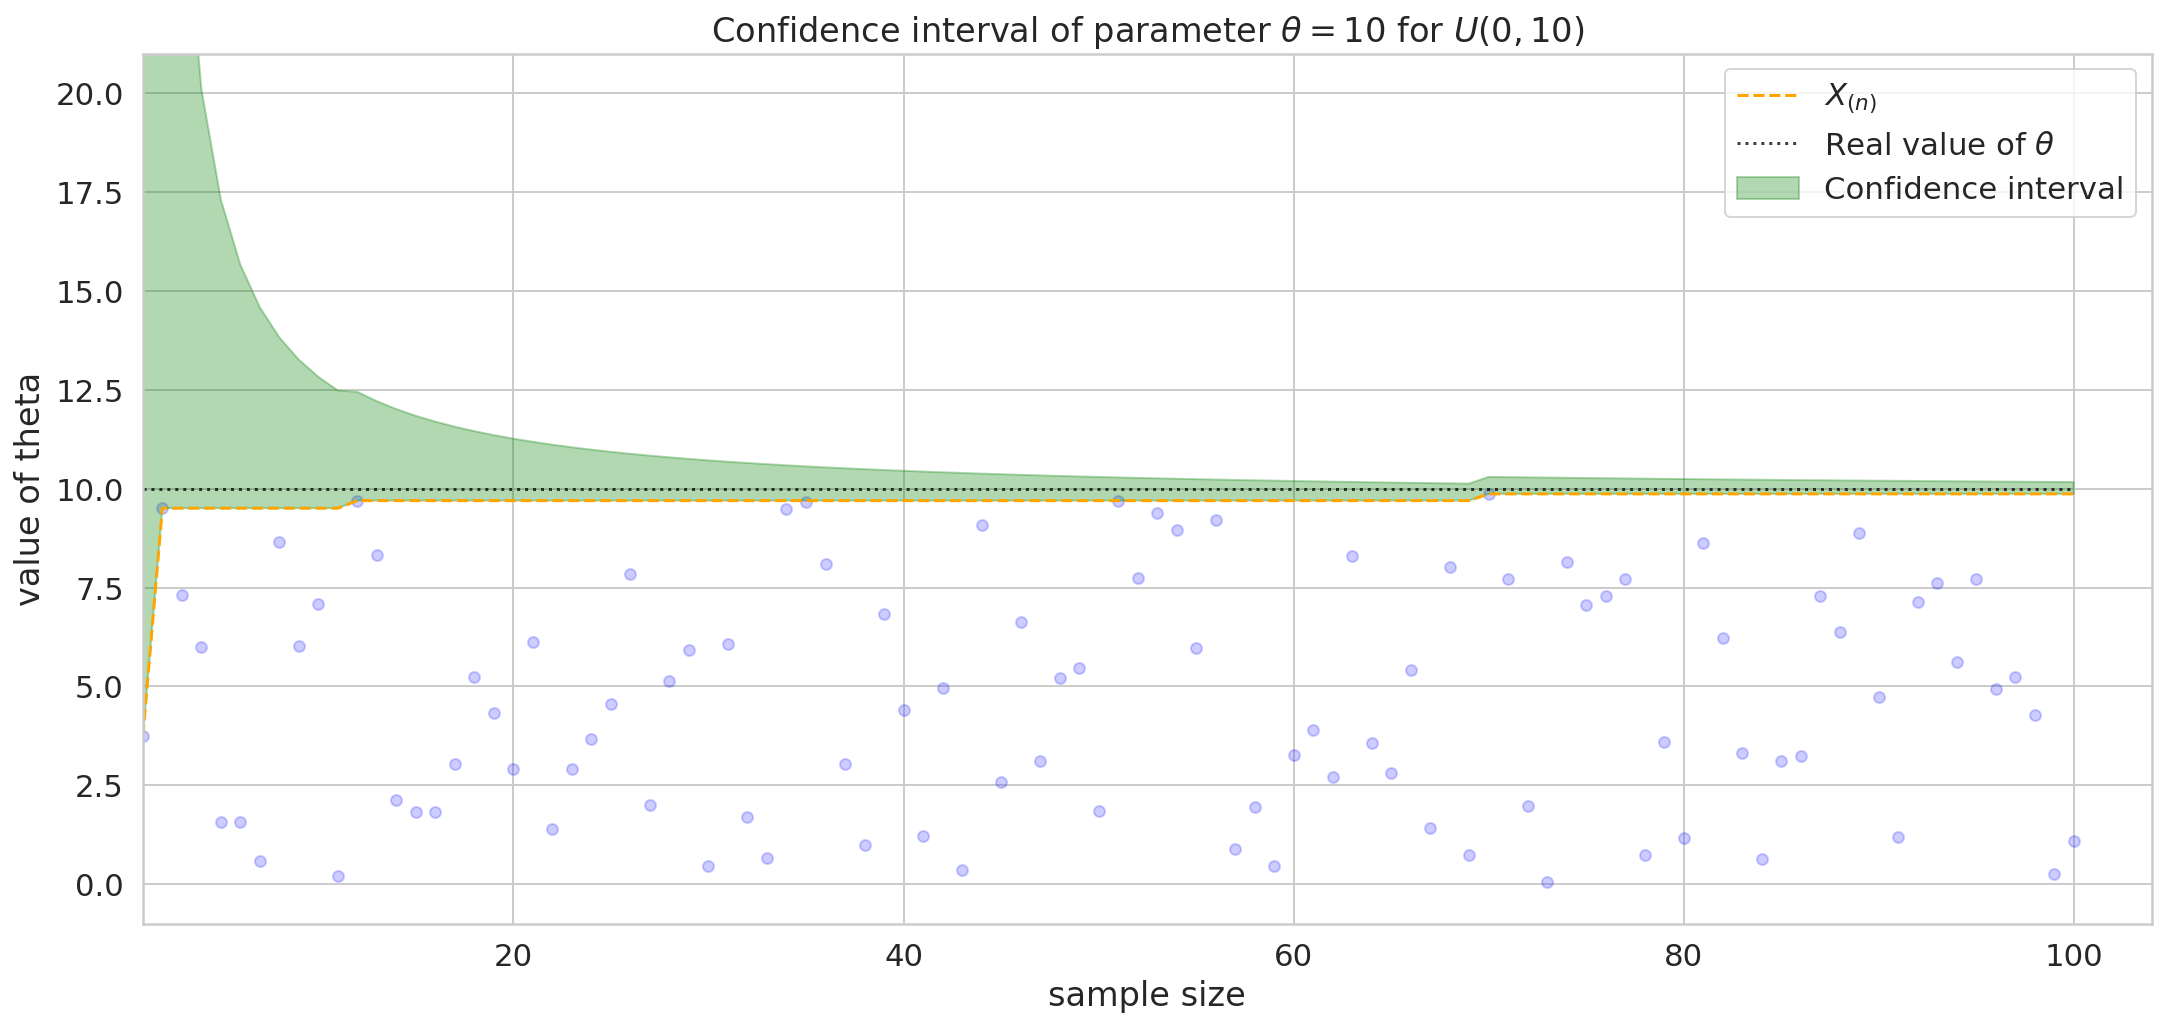

In [22]:
# YOUR CODE GOES HERE
uniform_sample = sps.uniform(loc=0, scale=10).rvs(size=N)

def uniform_estimates(sample):
  return [uniform_sample[:i].max() for i in range(1, N + 1)]

def uniform_confidence_interval(sample):
  n = sample.size
  uniform_upper_bound = 1 / np.power(1 - alpha, 1/n)
  uniform_theta_hat = sample.max()
  return [uniform_theta_hat, uniform_theta_hat * uniform_upper_bound]

uniform_intervals = np.array([uniform_confidence_interval(uniform_sample[:i]) for i in range(1, N + 1)])
draw_confidence_interval(theta, uniform_sample, uniform_estimates, '$U(0, 10)$', uniform_intervals, 11, 11, r'$X_{(n)}$')

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Один из искомых интервалов:
$$
  [\hat{\mu} - \dfrac{\pi \cdot u_{\frac{1 + \alpha}{2}}}{2\sqrt{n}}, \hat{\mu} - \dfrac{\pi \cdot u_{\frac{1 - \alpha}{2}}}{2\sqrt{n}}],
$$
где $ u_{\frac{1 - \alpha}{2}}, u_{\frac{1 + \alpha}{2}} $ -- квантили распределения $\mathcal{N}(0, 1)$.

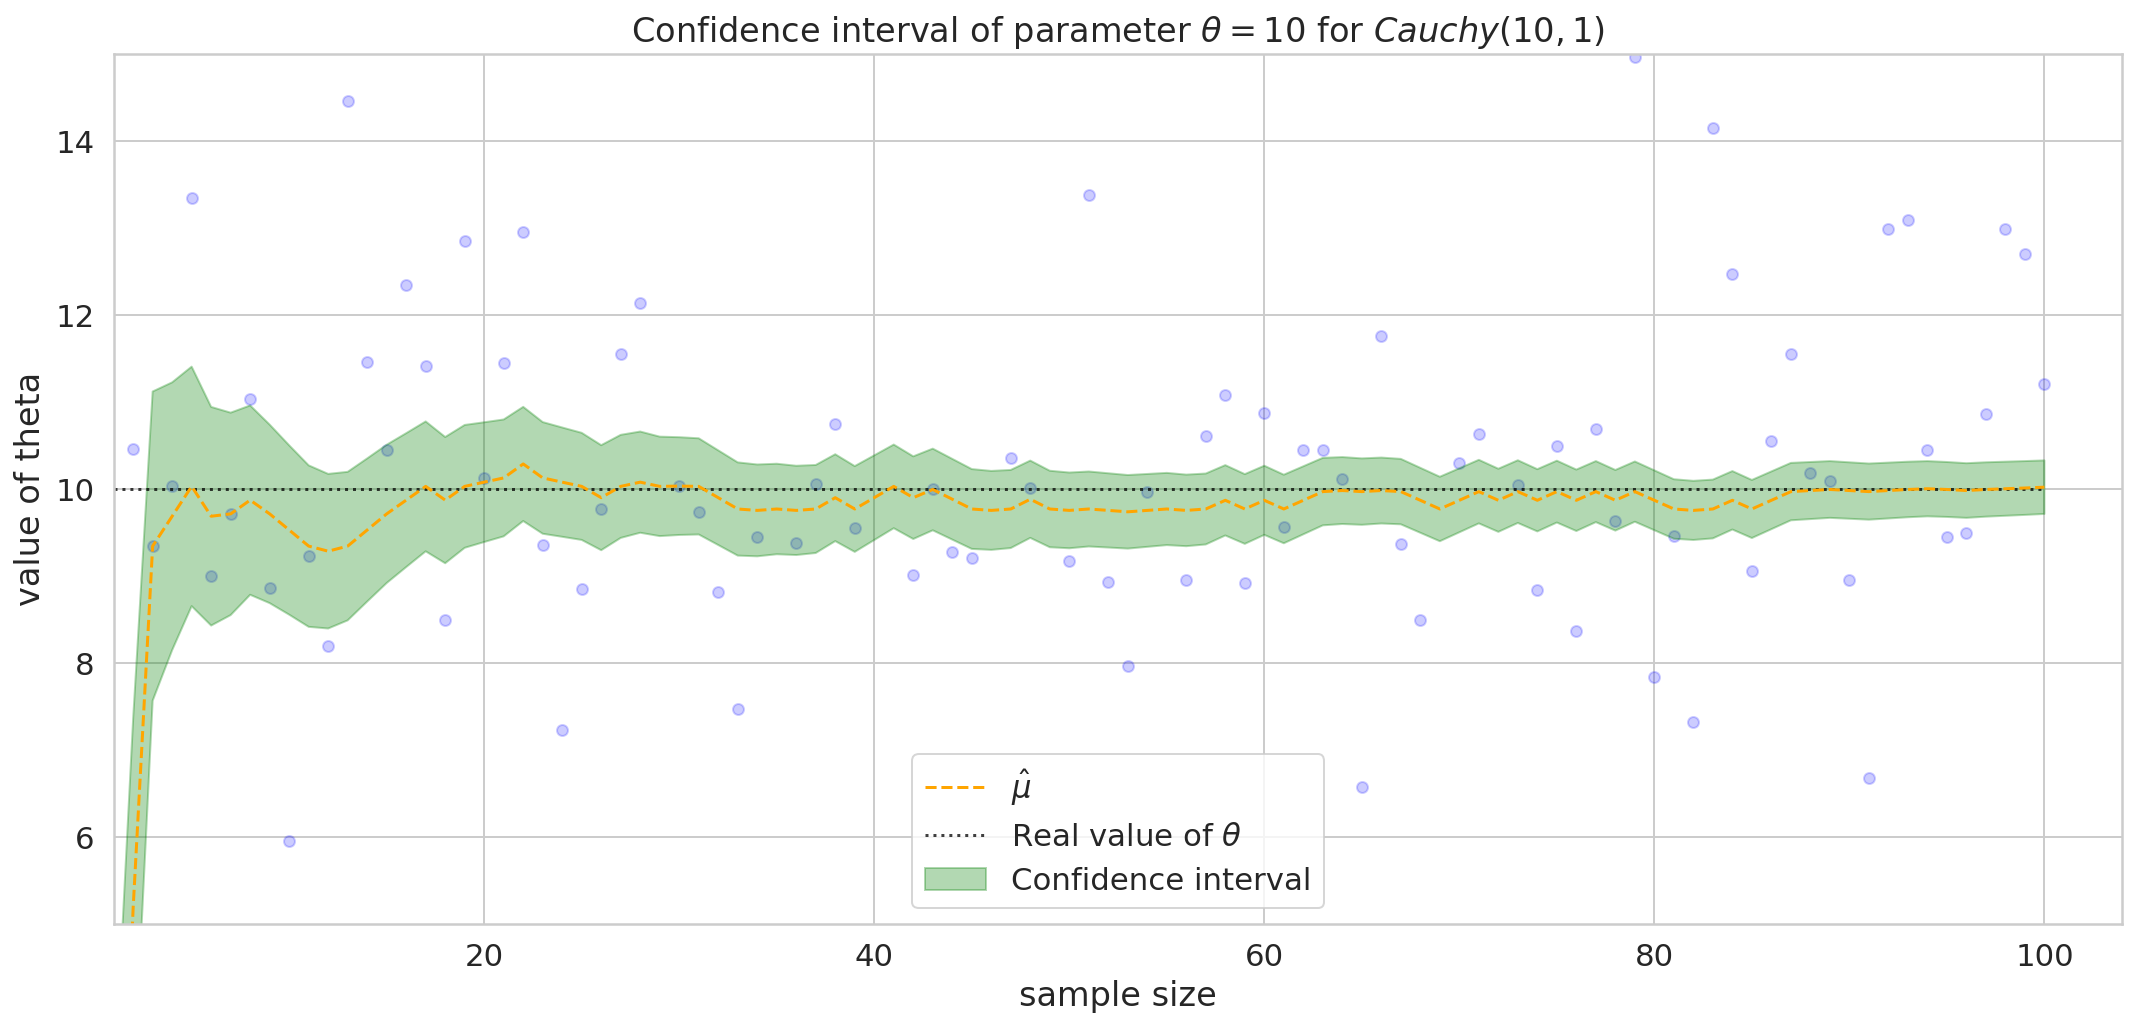

In [23]:
# YOUR CODE GOES HERE
cauchy_sample = sps.cauchy(loc=10, scale=1).rvs(size=N)

def cauchy_estimates(sample):
  return [np.median(cauchy_sample[:i]) for i in range(1, N + 1)]

def cauchy_confidence_interval(sample):
  n = sample.size 
  cauchy_theta_hat = np.median(sample)
  cauchy_lower_bound = cauchy_theta_hat - np.pi / (2 * np.sqrt(n)) * sps.norm().ppf(upper_bound)
  cauchy_upper_bound = cauchy_theta_hat - np.pi / (2 * np.sqrt(n)) * sps.norm().ppf(lower_bound)

  return [cauchy_lower_bound, cauchy_upper_bound]

cauchy_intervals = np.array([cauchy_confidence_interval(cauchy_sample[:i]) for i in range(1, N + 1)])
draw_confidence_interval(theta, cauchy_sample, cauchy_estimates, '$Cauchy(10, 1)$', cauchy_intervals, 5, 5, r'$\hat{\mu}$')

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Один из искомых интервалов:
$$
  [\overline{X} - u_{\frac{1 + \alpha}{2}} \sqrt{\frac{\overline{X}}{n}}, \overline{X} - u_{\frac{1 - \alpha}{2}} \sqrt{\frac{\overline{X}}{n}}],
$$

где $ u_{\frac{1 - \alpha}{2}}, u_{\frac{1 + \alpha}{2}} $ -- квантили распределения $\mathcal{N}(0, 1)$.

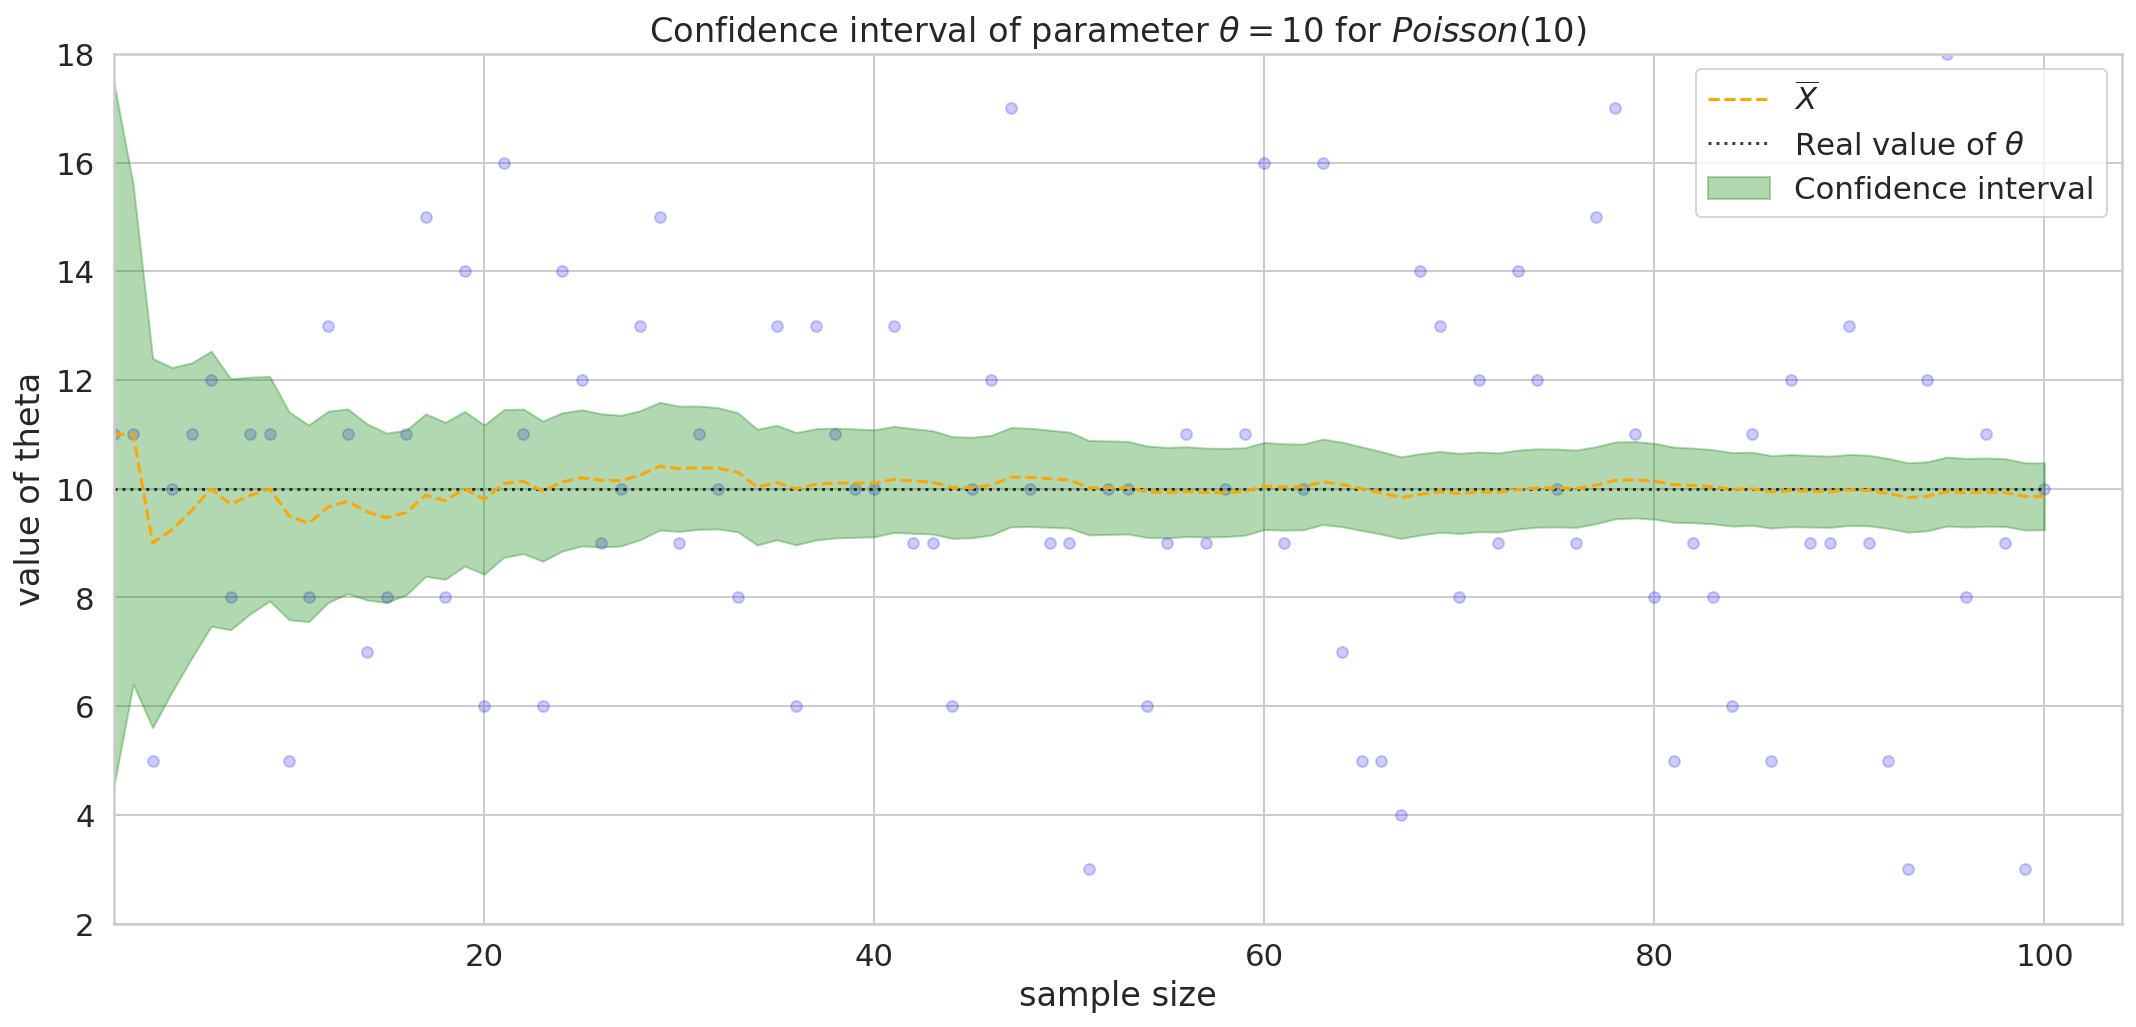

In [24]:
# YOUR CODE GOES HERE
poisson_sample = sps.poisson(10).rvs(size=N)

def poisson_estimates(sample):
  return [np.mean(poisson_sample[:i]) for i in range(1, N + 1)]

def poisson_confidence_interval(sample):
  n = sample.size 
  poisson_theta_hat = np.mean(sample)
  poisson_lower_bound = poisson_theta_hat - np.sqrt(poisson_theta_hat / n) * sps.norm().ppf(upper_bound)
  poisson_upper_bound = poisson_theta_hat - np.sqrt(poisson_theta_hat / n) * sps.norm().ppf(lower_bound)
  return [poisson_lower_bound, poisson_upper_bound]

poisson_intervals = np.array([poisson_confidence_interval(poisson_sample[:i]) for i in range(1, N + 1)])
draw_confidence_interval(theta, poisson_sample, poisson_estimates, '$Poisson(10)$', poisson_intervals, 8, 8, r'$\overline{X}$')

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Искомый интервал:
$$
  [\dfrac{\overline{X}}{\lambda + u_{\frac{1 + \alpha}{2}} \sqrt{\frac{\lambda}{n}}}; \dfrac{\overline{X}}{\lambda + u_{\frac{1 - \alpha}{2}} \sqrt{\frac{\lambda}{n}}}],
$$

где $ u_{\frac{1 - \alpha}{2}}, u_{\frac{1 + \alpha}{2}} $ -- квантили распределения $\mathcal{N}(0, 1)$.

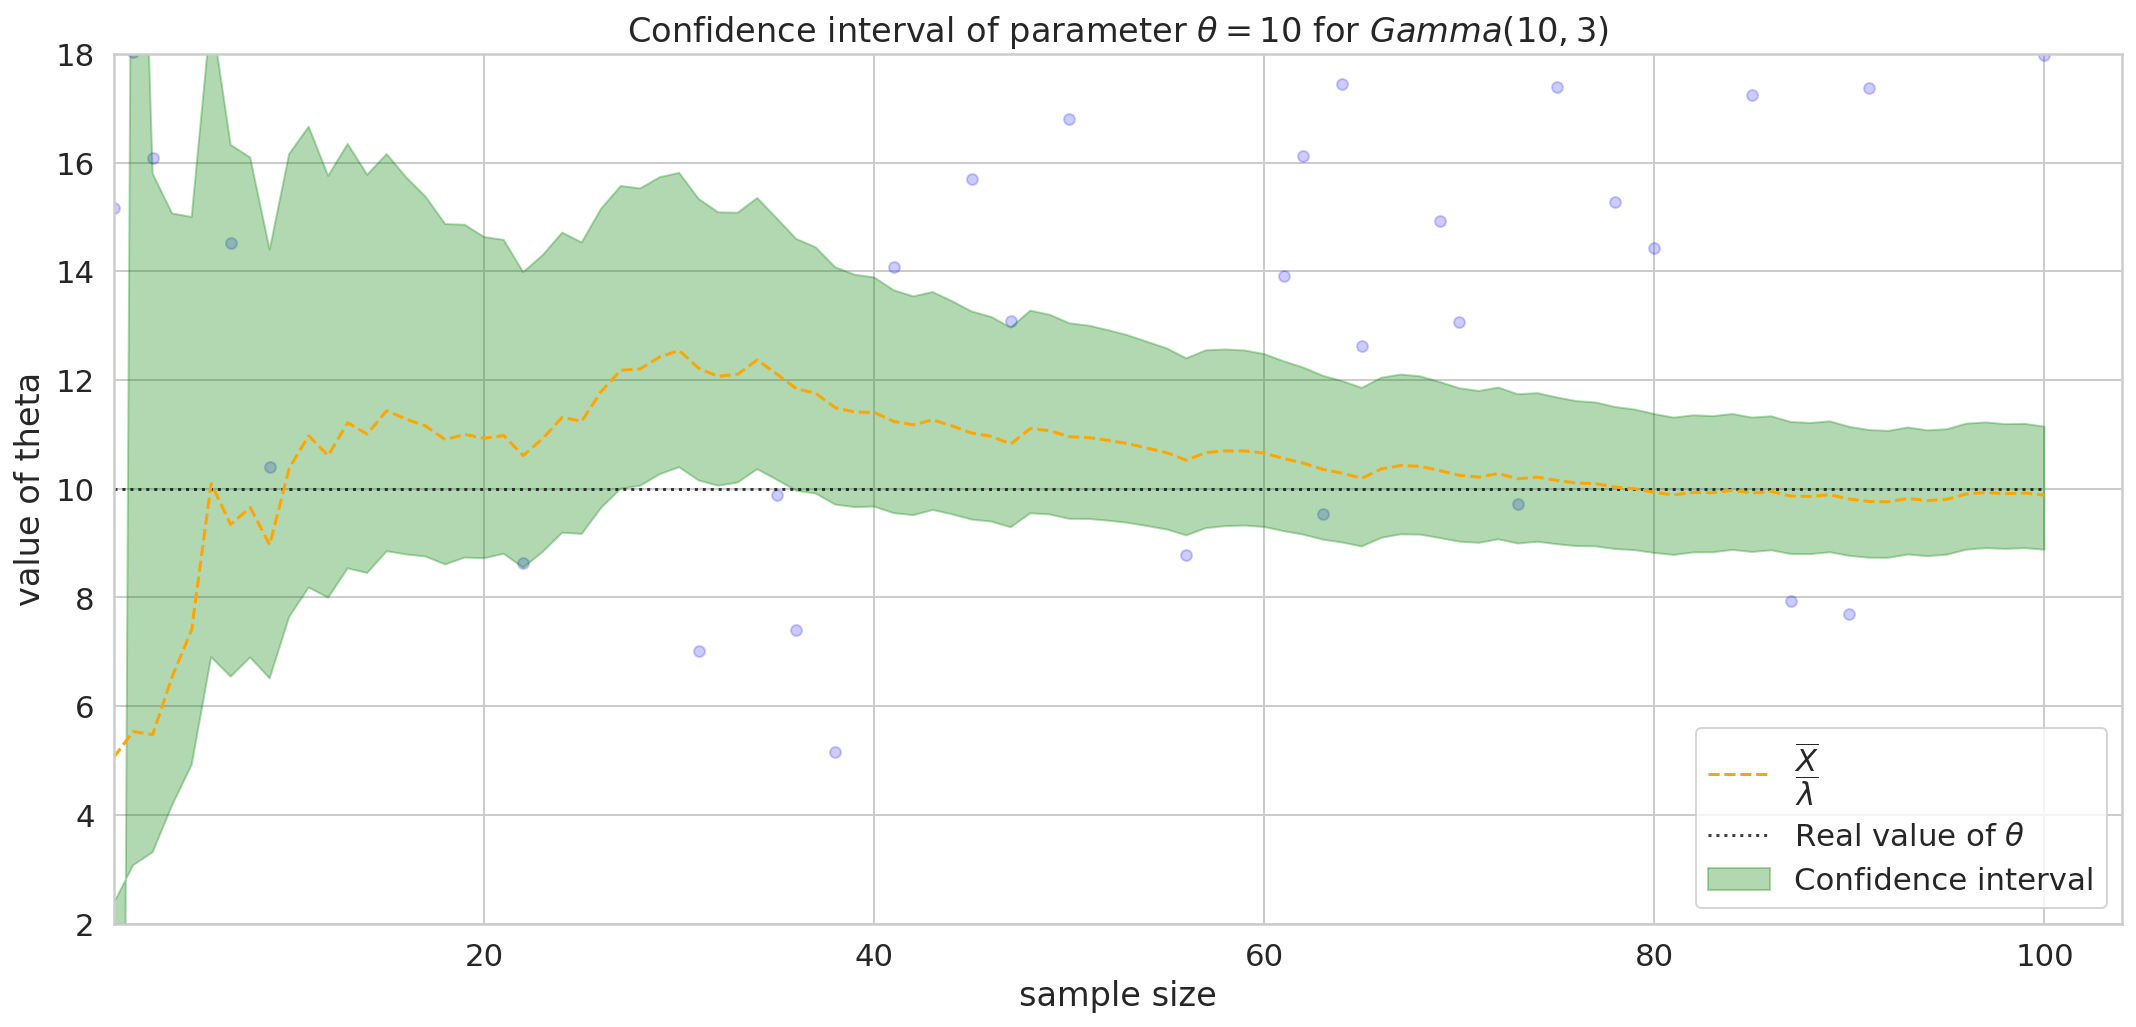

In [25]:
# YOUR CODE GOES HERE
a = 3
gamma_sample = sps.gamma(3, scale=10).rvs(size=N)

def gamma_estimates(sample):
  return [np.mean(gamma_sample[:i])/a for i in range(1, N + 1)]

def gamma_confidence_interval(sample):
  n = sample.size
  gamma_theta_hat = np.mean(sample)
  gamma_lower_bound = gamma_theta_hat / ( a + np.sqrt(a / n) * sps.norm().ppf(upper_bound))
  gamma_upper_bound = gamma_theta_hat / ( a + np.sqrt(a / n) * sps.norm().ppf(lower_bound))

  return [gamma_lower_bound, gamma_upper_bound]

gamma_intervals = np.array([gamma_confidence_interval(gamma_sample[:i]) for i in range(1, N + 1)])
draw_confidence_interval(theta, gamma_sample, gamma_estimates, '$Gamma(10, 3)$', gamma_intervals, 8, 8, r'$\dfrac{\overline{X}}{\lambda}$')


Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

**Вывод:** 
- Для равномерного распределения нижняя грань доверительного интервала монотонно взрастает, что обеспечивает быструю сходимость к 0 длины интервала. Верхняя грань при постоянном значении максимума выборки ведет себя как гипербола.
- Для распредлений Коши и Пуассона длина доверительного интервала уже при небольших $n$ становится небольшой и его длина уменьшается медленно с ростом $n$.
- Для Гамма-распределения длина доверительного интервала с ростом $n$ медленнее всего стремится к 0.

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__

In [26]:
# YOUR CODE GOES HERE
SIZE = 1000

### Равномерное распределение

In [28]:
# YOUR CODE GOES HERE
uniform_samples = np.array([sps.uniform(loc=0, scale=10).rvs(size=N) for i in range(SIZE)])

uni_intervals_multi = [uniform_confidence_interval(smpl) for smpl in uniform_samples]
uni_correct_est = np.array([1 if uni_intervals_multi[i][0] <= theta <= uni_intervals_multi[i][1] else 0 for i in range(SIZE)])

print(uni_correct_est.mean())


0.945


### Распределение Коши

In [29]:
# YOUR CODE GOES HERE
cauchy_samples = np.array([sps.cauchy(loc=10, scale=1).rvs(size=N) for i in range(SIZE)])

cauchy_intervals = [cauchy_confidence_interval(smpl) for smpl in cauchy_samples]
cauchy_correct_int = np.array([1 if cauchy_intervals[i][0] <= theta <= cauchy_intervals[i][1] else 0 for i in range(SIZE)])

print(cauchy_correct_int.mean())

0.938


### Распределение Пуассона

In [30]:
# YOUR CODE GOES HERE

poisson_samples = np.array([sps.poisson(10).rvs(size=N) for i in range(SIZE)])

poisson_intervals = [poisson_confidence_interval(smpl) for smpl in poisson_samples]
poisson_correct_int = np.array([1 if poisson_intervals[i][0] <= theta <= poisson_intervals[i][1] else 0 for i in range(SIZE)])

print(poisson_correct_int.mean())

0.936


### Гамма-распределение

In [31]:
# YOUR CODE GOES HERE
gamma_samples = np.array([sps.gamma(3, scale=10).rvs(size=N) for i in range(SIZE)])

gamma_intervals = [gamma_confidence_interval(smpl) for smpl in gamma_samples]
gamma_correct_int = np.array([1 if gamma_intervals[i][0] <= theta <= gamma_intervals[i][1] else 0 for i in range(SIZE)])

print(gamma_correct_int.mean())

0.954


Сделайте выводы.

**Вывод:** Не ну че вообще топ.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

Построим точный доверительный интервал. Воспользуемся следующей теоремой.

**Теорема.** Пусть $\xi \sim \mathcal{N}(0, 1),\: \eta \sim \chi^2(n)$. Тогда случайная величина

$$
  \dfrac{\sqrt{n}\xi}{\sqrt{\eta}}
$$

имеет распределение Стьюдента с $n-1$ степенями свободы.

**Теорема.** Пусть $X_1, \ldots, X_n \sim \mathcal{N}(0, \sigma^2)$. Тогда случайная величина

$$
  \sum _{i=1}^n \left(\frac{X_i - \overline{X}}{\sigma}
\right)^2
$$

имеет распределение $\chi^2(n-1)$.

Один из точных доверительных интервалов, поcтроенный с использованием приведенных фактов, имеет вид:

$$
  \left[ \overline{X} - u_{\frac{1 + \alpha}{2}} \sqrt{\dfrac{\sum _{i=1}^n(X_i - \overline{X})^2}{n(n-1)}}, 
    \overline{X} - u_{\frac{1 - \alpha}{2}} \sqrt{\dfrac{\sum _{i=1}^n(X_i - \overline{X})^2}{n(n-1)}}\right],
$$

где $ u_{\frac{1 - \alpha}{2}}, u_{\frac{1 + \alpha}{2}} $ -- квантили распределения Стьюдента с $n-1$ степенями свободы.

Асимптотический интервал, полученный из ЦПТ, имеет вид:

$$
  \left[ \overline{X} - u_{\frac{1 + \alpha}{2}} \sqrt{\dfrac{\sum _{i=1}^n(X_i - \overline{X})^2}{n(n-1)}}, 
    \overline{X} - u_{\frac{1 - \alpha}{2}} \sqrt{\dfrac{\sum _{i=1}^n(X_i - \overline{X})^2}{n(n-1)}}\right],
$$

где $ u_{\frac{1 - \alpha}{2}}, u_{\frac{1 + \alpha}{2}} $ -- квантили распределения $\mathcal{N}(0, 1)$.



In [36]:
n = 30
a = 0
sigma = 2
# Need to estimate sigma

normal_sample = sps.norm(loc=a, scale=sigma).rvs(size=n)

lower_bound = (1 - alpha) / 2
upper_bound = (1 + alpha) / 2

In [37]:
def calculate_exact_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    size = sample.size
    mean = sample.mean()
    variance = sample.var()
    lower_quantile = sps.t(size-1).ppf(lower_bound)
    upper_quantile = sps.t(size-1).ppf(upper_bound)
    return np.array([mean - upper_quantile * variance / np.sqrt(size-1), mean - lower_quantile * variance / np.sqrt(size-1)])


In [40]:
def calculate_asymptotic_conf_interval(
    sample: np.ndarray, 
    alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    size = sample.size
    mean = sample.mean()
    variance = sample.var(ddof=1)
    lower_quantile = sps.norm().ppf(lower_bound)
    upper_quantile = sps.norm().ppf(upper_bound)
    return np.array([mean - upper_quantile * variance / np.sqrt(size-1), mean - lower_quantile * variance / np.sqrt(size-1)])

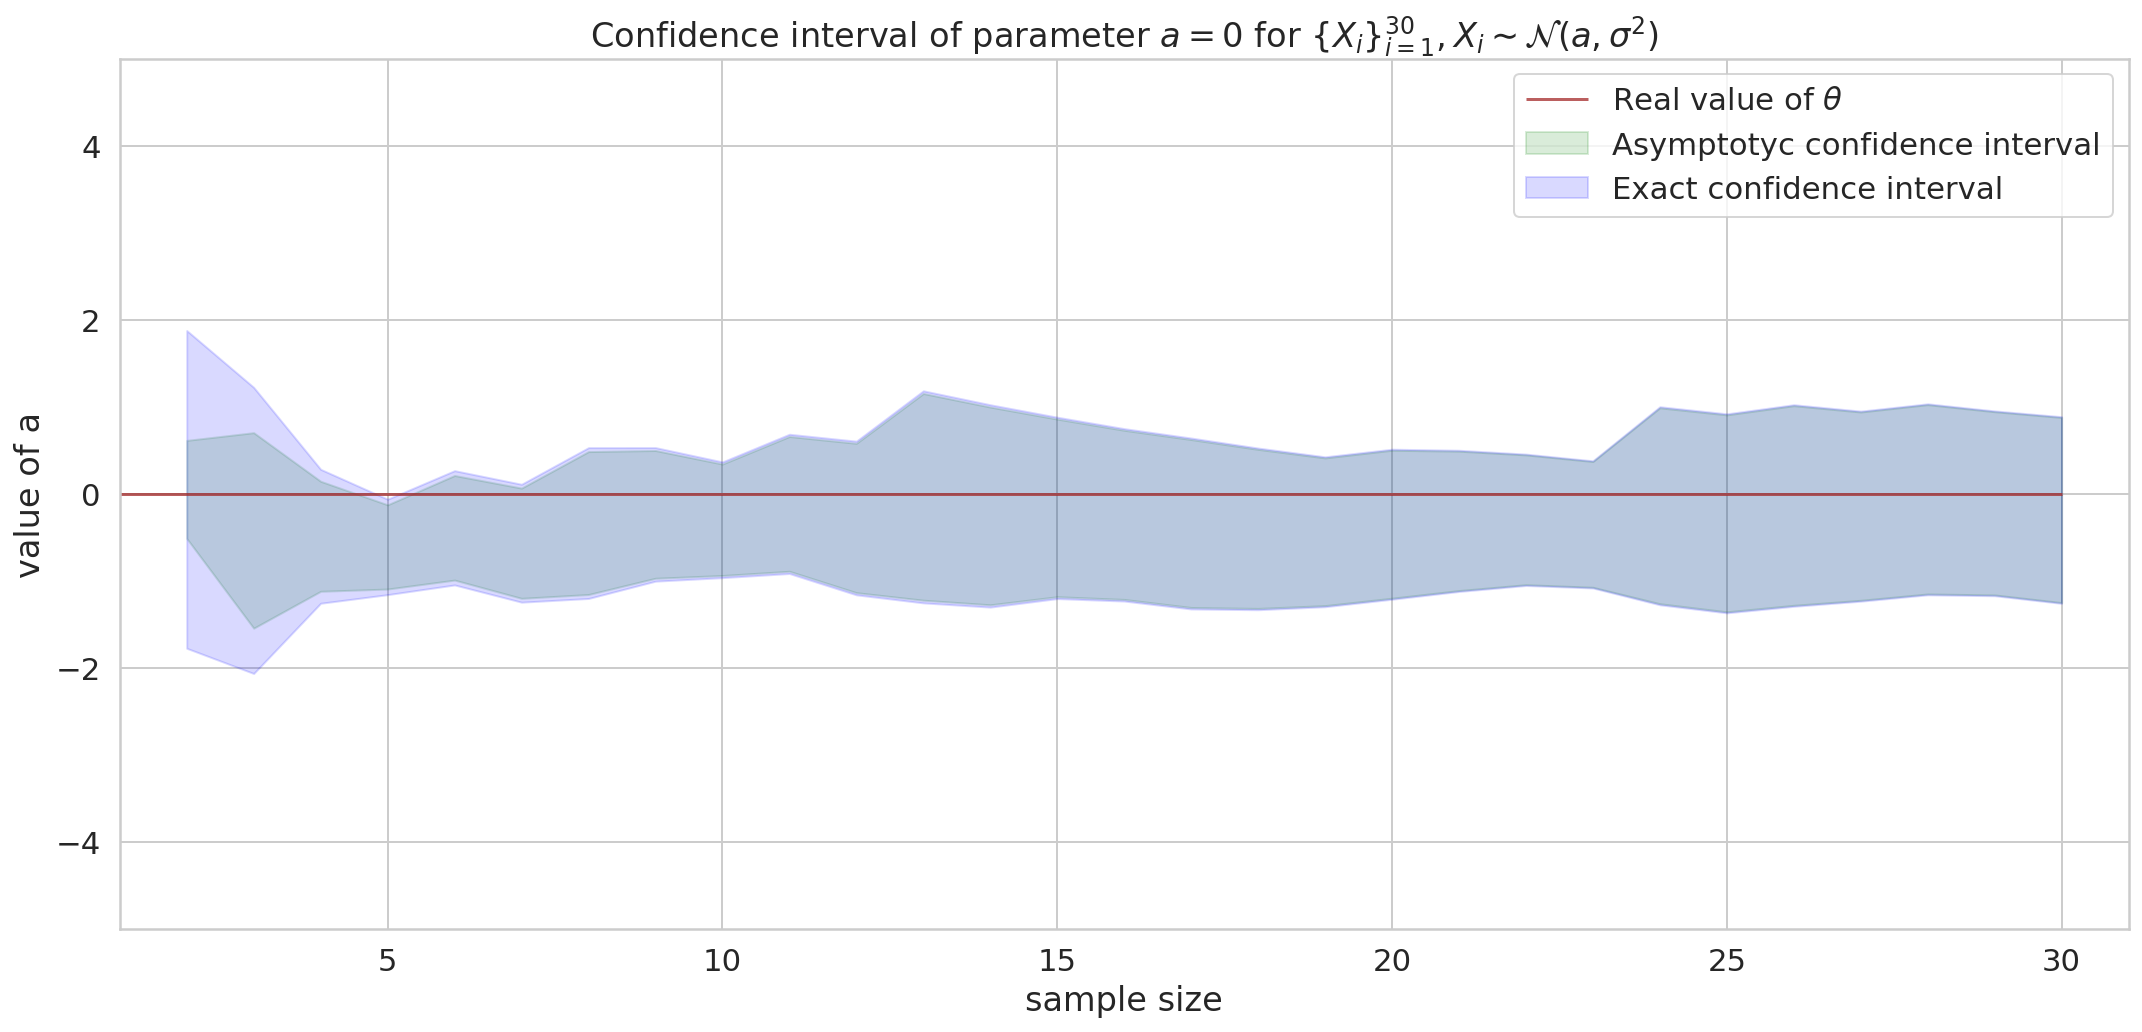

In [41]:
def cum_exact_intervals(sample, f):
  return np.array([f(sample[:i]) for i in range (2, n + 1)])

def cum_asymp_intervals(sample, f):
  return np.array([f(sample[:i]) for i in range (2, n + 1)])

def draw_normal_sigma_confidence_intervals(sample, a, exact_intervals, asymptotyc_intervals):
  x = np.arange(n-1) + 2

  plt.figure(figsize=(18, 8))
  plt.title(r"Confidence interval of parameter $a = 0$ for $\{X_i\}_{i=1}^{30}, X_i \sim \mathcal{N}(a, \sigma^2) $")
  plt.hlines(y=a, xmin=1, xmax=n, color='brown', alpha=0.75, label=r'Real value of $\theta$')
  #plt.plot(x, estimates(sample), linestyle='--', color = "orange", label=estimate_label)
  plt.fill_between(x, asymptotyc_intervals.T[0], asymptotyc_intervals.T[1],
                 alpha=0.15, color='green', label='Asymptotyc confidence interval')
  plt.fill_between(x, exact_intervals.T[0], exact_intervals.T[1],
                 alpha=0.15, color='blue', label='Exact confidence interval')
  
  
  plt.xlabel("sample size")
  plt.ylabel(r"value of a")
  plt.ylim(a -5, a + 5)
  plt.xlim(1, 31)
  plt.legend()
  plt.show()

draw_normal_sigma_confidence_intervals(normal_sample, a, cum_exact_intervals(normal_sample, calculate_exact_conf_interval),
                                       cum_asymp_intervals(normal_sample, calculate_asymptotic_conf_interval))

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

**Вывод** При малых значениях $n$ длина точного интервала существенно меньше, чем длина асиматотического интервала. В то же время из графика видно, что для $n \geqslant 25$ разница между размерами интервалов несущественна.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [42]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC

Downloading...
From: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC
To: /content/city_day.csv
100% 2.57M/2.57M [00:00<00:00, 81.3MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [43]:
import pandas as pd
df = pd.read_csv("city_day.csv")
df = df[['City', 'Date', 'AQI']]
df = df.dropna()
df.head()

,City,Date,AQI
28,Ahmedabad,2015-01-29,209.0
29,Ahmedabad,2015-01-30,328.0
30,Ahmedabad,2015-01-31,514.0
31,Ahmedabad,2015-02-01,782.0
32,Ahmedabad,2015-02-02,914.0


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [44]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех дней с 1 июля 2018 года включительно

In [45]:
mumbai = df[df['City'] == 'Mumbai']
kolkata = df[df['City'] == 'Kolkata']

mumbai.head()

,City,Date,AQI,Year,Month
23077,Mumbai,2018-05-07,73.0,2018,5
23078,Mumbai,2018-05-08,82.0,2018,5
23079,Mumbai,2018-05-09,84.0,2018,5
23080,Mumbai,2018-05-10,77.0,2018,5
23081,Mumbai,2018-05-11,73.0,2018,5


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 - \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 + \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [57]:
def get_dataset_by_month(
    df: pd.DataFrame, 
    year: int,
    month: int
):
    """ Сохранение в массив данные для указанного месяца и года. """
    
    return np.array(df[(df['Year'] == year) & (df['Month'] == month)]['AQI'])


In [58]:
def get_bootstrap_samples(
    sample: np.ndarray,
    k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
  
    return np.array([np.random.choice(sample, size = sample.size) for i in range(k)]) # With replacement 


In [65]:
def bootstrap_conf_interval(
    sample: np.ndarray,
    estimator: Callable = lambda x: np.mean(x, axis=-1),
    alpha: float = 0.95,
):
    boot_estimates_array = estimator(get_bootstrap_samples(sample)) 
    boot_estimates_array.sort()
    lower_boot_bound = int(np.floor(1000 * lower_bound)) # lower_bound = (1 - alpha) / 2
    upper_boot_bound = int(np.ceil(1000 * upper_bound))
    return np.array(boot_estimates_array[lower_boot_bound], boot_estimates_array[upper_boot_bound])


In [68]:
ym = mumbai[['Year', 'Month']].drop_duplicates().values[:-1]
bootstrap_estimate_mumbai_by_month = np.array([bootstrap_conf_interval(get_dataset_by_month(mumbai, year, month)) for year, month in ym])
mumbai_size = ym.shape[0]

ym = kolkata[['Year', 'Month']].drop_duplicates().values[:-1]
bootstrap_estimate_kolkata_by_month = np.array([bootstrap_conf_interval(get_dataset_by_month(kolkata, year, month)) for year, month in ym])
kolkata_size = ym.shape[0]

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
labels = [f"{year}-{month}" for year, month in ym] # номера месяцев для подписей на графике 

x_m = np.arange(mumbai_size) + 1
x_k = np.arange(kolkata_size) + 1



plt.figure(figsize=(18, 8))
plt.title(r"Confidence interval of parameter $a = 0$ for $\{X_i\}_{i=1}^{30}, X_i \sim \mathcal{N}(a, \sigma^2) $")
plt.hlines(y=a, xmin=1, xmax=n, color='brown', alpha=0.75, label=r'Real value of $\theta$')
#plt.plot(x, estimates(sample), linestyle='--', color = "orange", label=estimate_label)

#plt.plot(x_m, estimates(sample), linestyle='--', color = "orange", label=estimate_label)
plt.fill_between(x, asymptotyc_intervals.T[0], asymptotyc_intervals.T[1],
                alpha=0.15, color='green', label='Asymptotyc confidence interval')


plt.fill_between(x, exact_intervals.T[0], exact_intervals.T[1],
                alpha=0.15, color='blue', label='Exact confidence interval')


plt.xlabel("sample size")
plt.ylabel(r"value of a")
plt.ylim(a -5, a + 5)
plt.xlim(1, 31)
plt.legend()
plt.show()



# YOUR CODE GOES HERE

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [ ]:
# YOUR CODE GOES HERE

Теперь проделайте то же самое для Калькутты

In [ ]:
# YOUR CODE GOES HERE

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?